In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

color = sns.color_palette()
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', 20)

C:\Users\chigrai_au\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Загрузка данных

In [7]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Посмотрим, все ли записи в данных уникальны

In [9]:
data['Id'].nunique()

10000

Уникальных значений - 10 000, что говорит о том, что все наблюдения в данных уникальны и нет дублей. Далее Посмотрим полноту данных в датафрейме

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


В данных присутсвуют два поля "LifeSquare" и "Healthcare_1", у которых пропущены значениия. Далее посмотрим статистику по данным датафрейма

In [11]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Статистика показывает, что данные не чистые и содержат явные аномалии. Например , жилая площадь равная 7481 квадратным метрам, квартира на 117 этаже, и какие-то совсем невнятные данные о годе постройки дома.

Для сравнения посмотрим описательную статистику тестовых данных

In [12]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


Прежде чем исправлять данные, посмотрим типы данных для определения категориальных признаков

In [13]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Поля Ecology_2, Ecology_3, Shops_2 имеют тип данных object, значит данные в этих полях категориальные. Проверим количество категорий в каждом поле

In [14]:
print(data['Ecology_2'].nunique(), 
      data['Ecology_3'].nunique(), 
      data['Shops_2'].nunique())

2 2 2


Каждое из полей содержит только ддве категории, поэтому можно заменить значение категорий в каждом поле на 0 и 1 соответственно.

Далее посмотрим распределение цены в датафрейме

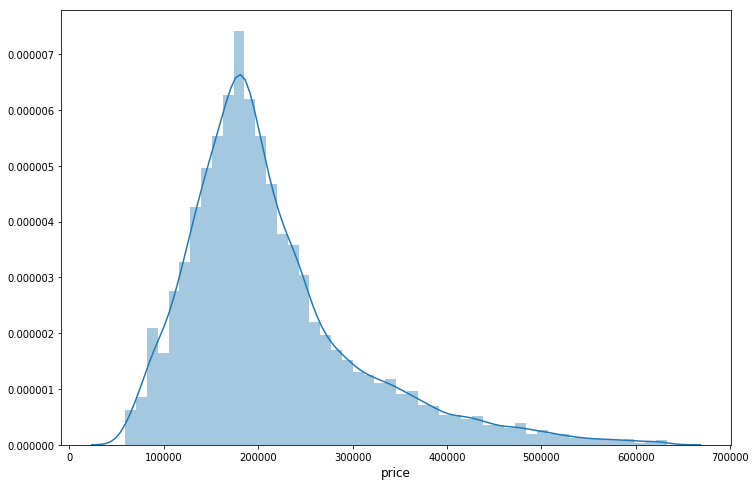

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(data['Price'], bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

Распределение цены имеет большой правый хвост, что делает само распределение логнормальным. 
Так же на графике можно увидеть, что большинство квартир (домов) стоит около 200 000 долларов 

Разделим датафрейм на обучающую и проверочную выборки

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)
train.shape, valid.shape

((7000, 20), (3000, 20))

### Первоначальная чистка  данных

Первоначальная чистка данных будет состоять из 3-х этапов:
1. Преобразование категориальных переменных в числовые
2. Обработка аномальных значений
3. обработка пустых значений


Опишем функцию преобразования категориальных признаков датафрейма в числовые

In [18]:
def change_categorial(df):
    '''Функция обходит датафрейм и каждое поле с типом object и методом
        LabelEncoder преобразовывает значения в числовые признаки
    '''
    for f in df.columns:
        if df[f].dtype=='object':
            lbl = LabelEncoder()
            lbl.fit(list(df[f].values)) 
            df[f] = lbl.transform(list(df[f].values))
            
    return df

Опишем функцию для поиска и корректировки аномалий в датафрейме. Аномалией будем считать в данном случае если значение датафрейма не попадает в отрезок

25% квартиль - 4 \* интеркваритильный размах, 75% квартиль + 4 \* интерквартильный размах

Значения за пределами отрезка будем приравнивать к значению соответствующего квартиля

In [19]:
def reshape_outliers(df, df_quartiles):
    '''
    Описание:
        Функция смотрит находит аномальные значения в каждом поле датафрейма и приравнивает аномалии
        к значениям квартилей из таблицы квартилей
        
    Входные данные:
        df: датафрейм с признаками
        df_quartiles: датафрейм с квартилями признаков
    
    Выход: 
        датафрейм с обработанными аномальными значениями
    '''
    columns = df_quartiles.columns
    for col in columns:
        # Для каждого поля получаем значения квартилей    
        first_quartile = df_quartiles[col]['25%']
        third_quartile = df_quartiles[col]['75%']  

        # Интерквартильный размах
        iqr = third_quartile - first_quartile
        
        df.loc[df[col] < (first_quartile - 4 * iqr), col] = first_quartile
        df.loc[df[col] > (first_quartile + 4 * iqr), col] = third_quartile
      
         
    return df

Напишем функцию обработки пустых значений признаков LifeSquare и Healthcare_1. Для LifeSquare мы заполнять на основании доли жилой площади в общей площади квартиры, а пропущенные значения Healthcare_1 заполним нулями

In [20]:
def fill_na(df, ratio_coef):
    '''         
    Входные данные:
        df: датафрейм с признаками
        ratio_coef: средняя доля жилой площади в общей плоащди квартиры
    
    Выход: 
        датафрейм с заполненными пропущенными значениями
    '''    
    df['LifeSquare'] = df['LifeSquare'].fillna(df['Square'] * ratio_coef)
    df['Healthcare_1'] = df['Healthcare_1'].fillna(0)
    
    return df    

Соберем все функции вместе

In [21]:
def first_clean_data(df, ratio_coef, subset, df_quartiles=None):
    assert subset in ['train', 'test']
    df = change_categorial(df)
    if subset == 'train':
        df = reshape_outliers(df, df_quartiles)
    df = fill_na(df, ratio_coef)
    return df

Сделаем первоначальную очистку данных для train.

In [22]:
# Поля, для которых необходимо убрать аномальные значения
feat_outliers = train.drop(['Price', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis=1).columns
feat_outliers

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1'],
      dtype='object')

In [23]:
df_quartiles_train = train.describe().loc[['25%', '75%']][feat_outliers]

In [24]:
ratio_coef = (train.loc[train['LifeSquare'].notna(), 'LifeSquare']
              / train.loc[train['LifeSquare'].notna(), 'Square']).mean()

In [25]:
train = first_clean_data(train, ratio_coef, 'train', df_quartiles_train)
valid = first_clean_data(valid, ratio_coef, 'test')

Посмотрим статистику датафрейма train после первичной обработки

In [26]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.885143,55.903119,36.552353,5.744571,8.517000,12.604286,1984.923000,0.117840,0.990857,0.971143,24.767571,5364.425714,2.900286,589.939571,1.313143,3.840429,0.916571,214449.167390
std,4864.141324,43.744178,0.810671,18.062588,15.674645,3.985423,5.206851,6.540737,18.308861,0.118599,0.095187,0.167417,17.583889,4011.768297,3.423034,927.590901,1.488326,3.807760,0.276549,92924.798790
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4176.500000,19.000000,1.000000,41.744710,24.799619,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,0.000000,1.000000,1.000000,154599.240157
50%,8398.500000,37.000000,2.000000,52.633656,33.631432,6.000000,7.000000,14.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,30.000000,1.000000,3.000000,1.000000,192290.039215
75%,12562.000000,75.000000,2.000000,65.980788,45.121115,9.000000,12.000000,17.000000,2001.000000,0.194489,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249080.956886
max,16796.000000,209.000000,5.000000,138.427694,111.455258,32.000000,33.000000,40.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,20.000000,4849.000000,6.000000,19.000000,1.000000,627525.072788


Теперь статистика выглядит гораздо лучше. Квартиры не более 5 комнат, год постройки не превышает 2020 год,максимальные  квартильные значения параметров теперь логичны.

### Вторичная обработка данных

Вторичная обработка данных подразумевает 2 действия:
 1. Поиск и удаление взимосвязанных признаков (очистка мультиколлинеарности)
 2. Добавление новых признаков, экстраполирующих целевую переменную 

Опишем функцию, которая находит мультиколлинеарные признаки, и определим взимосвязанные признаки

In [27]:
def get_collinear_features(df, threshold):
    '''
    Описание:
        Функция обходит матрицу корреляций, сранивая попарно признаки в датафрейме.
        Если корреляция между признаками выше установленного порога, то такие данные
        мультиколлинеарные.
        
    Входные данные:
        df: датафрейм с признаками
        threshold: Порог корреляции, когда признаки считаются сильно связанными между собой
    
    Выход: 
        массив, который содержит пары мультиколлинеарных признаков
    '''
    
    # Удаление целевой переменной из датафрейма   
    x = df.drop('Price', axis=1)
    
    # Расчет матрицы корреляций
    corr_matrix = x.corr()    
    iters = range(len(corr_matrix.columns) - 1)    
    drop_cols = []

    # Обход матрицы, попарно сравнивая признаки между собой
    for i in iters:        
        for j in range(i+1):            
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]            
            col = item.columns            
            row = item.index            
            val = abs(item.values)           
            
            # Если корреляция превышает порог
            if val >= threshold:                
                drop_cols.append((col.values[0], row.values[0], round(val[0][0], 2))) 
      
    return drop_cols

In [28]:
get_collinear_features(train, 0.7)

[('Square', 'Rooms', 0.78),
 ('LifeSquare', 'Square', 0.78),
 ('Social_2', 'Social_1', 0.96)]

Существует 3 пары взаимозависимых переменных. Удалим из датафрейма признаки Rooms, LifeSquare, Social_1

In [29]:
train = train.drop(['Rooms', 'LifeSquare', 'Social_1'], axis=1)
valid = valid.drop(['Rooms', 'LifeSquare', 'Social_1'], axis=1)

Посмотрим, какие признаки  влияют на цену квартир

In [30]:
train.corr()['Price'].sort_values()

Ecology_1       -0.064129
Ecology_3       -0.051992
Id               0.019332
Ecology_2        0.030568
HouseYear        0.035142
Shops_2          0.061129
HouseFloor       0.089112
Floor            0.124719
Healthcare_1     0.170345
Social_2         0.240089
Helthcare_2      0.253601
DistrictId       0.264105
Shops_1          0.268989
Social_3         0.293413
KitchenSquare    0.324810
Square           0.594402
Price            1.000000
Name: Price, dtype: float64

Построим график зависимости цены квартиры от площади

In [31]:
def build_scatter(X, y, size=(6,6), kind='scatter'):    
    plt.figure(figsize=size)
    sns.jointplot(x=X, y=y, size=10, kind=kind)
    plt.ylabel(f'{X.name}', fontsize=12)
    plt.xlabel(f'{y.name}', fontsize=12)
    plt.show()

<Figure size 432x432 with 0 Axes>

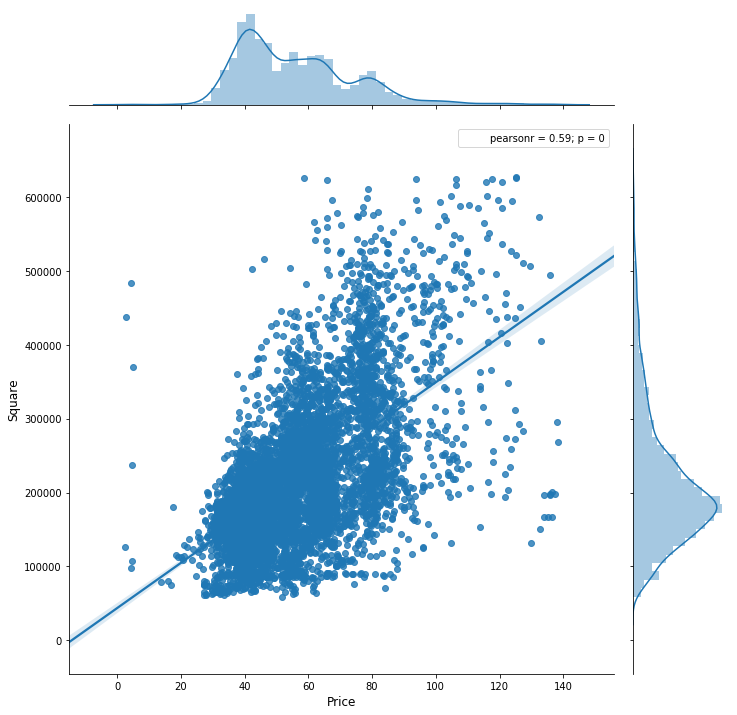

In [32]:
build_scatter(train['Square'], train['Price'], kind='reg')

Цена на квартиру линейно зависит от площади квартиры. Посмотрим, есть ли взаимосвязи в ближайших по корреляции признаках

<Figure size 432x432 with 0 Axes>

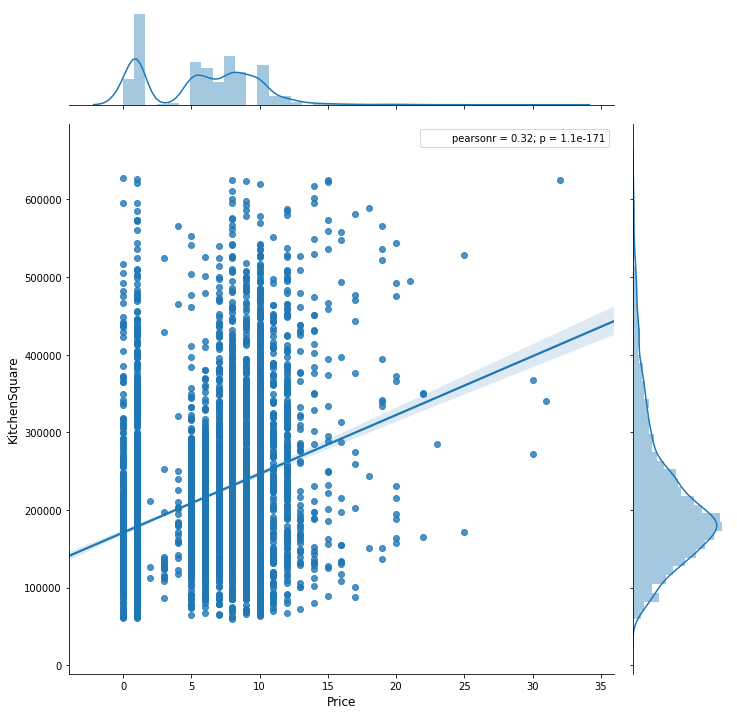

In [33]:
build_scatter(train['KitchenSquare'], train['Price'], kind='reg')

<Figure size 432x432 with 0 Axes>

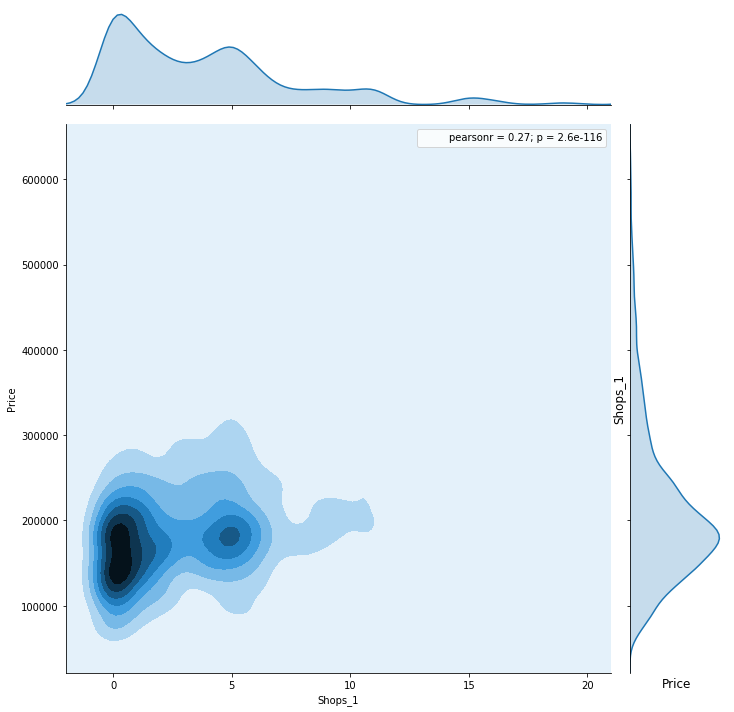

In [34]:
build_scatter(train['Shops_1'], train['Price'], kind='kde')

По остальным признакам не наблюдается явной зависимости, поэтому воспользуемся дополнительными данными
для лучшего описания целевой переменной, но сначала построим модель на базовых данных, используя модель случайного леса. В качестве метрики используется коэффициент детерминации r2_score.

In [35]:
def evaluate_model(model, X_train, X_valid, y_train, y_valid):    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)
    r2_train = r2_score(y_train, y_pred_train)
    r2_valid = r2_score(y_valid, y_pred_valid)
    return r2_train, r2_valid

In [36]:
X_train = train.drop(['Id','Price'], axis=1)
X_valid = valid.drop(['Id','Price'], axis=1)
y_train = train['Price']
y_valid = valid['Price']

In [37]:
model = RandomForestRegressor(n_estimators=100, max_depth=15, max_features=8, random_state=102, min_samples_leaf=1)
r2_train, r2_valid = evaluate_model(model, X_train, X_valid, y_train, y_valid)
print(f'r2_score на обучающей выборке = {r2_train}\n'
      f'r2_score на тестовой выборке = {r2_valid}')

r2_score на обучающей выборке = 0.9418638924737193
r2_score на тестовой выборке = 0.7345589658420479


Теперь добавим данные, которые помогут повысить точность нашей модели

Напишем функцию, которая группирует данные по выбранному полю и функцию, которая присоединяет полученные данные к датафрейму

In [38]:
def get_stats(df, group, target, aggr_f='mean'):
    '''Функция группирует поля по целевому значению. 
    В качестве агрегирующих функций принимается среднее или медиана.
    Функция возвращает кортеж из сгруппированных данных, среднего значения и имени новой статистики'''
    
    grouped = df.groupby(group, as_index=False)    
    
    if aggr_f == 'mean':
        stats = grouped[[target]].mean()
        means = df[target].mean()
    else:
        stats = grouped[[target]].median()
        means = df[target].median()
        
    name_stats = f'{aggr_f}_{group}_by_{target}'
    stats = stats.rename(columns = {target: name_stats})    
   
    return stats, means, name_stats

In [39]:
def add_stats(df, stats, means):
    '''Функция принимает датафрейм и делает левое соединение 
    по сгрупированным данным. Пропущенные значения заполняются средним значением'''
    
    group = list(stats.columns[:len(stats.columns)-1])  
    name_stats = stats.columns[-1]
    df = pd.merge(df, stats, on=group, how='left')
    df[name_stats] = df[name_stats].fillna(means)
    
    return df

In [40]:
def apply_stats(df, stats):
    '''Функция присоединяет статистики к датафрейму и заполняет пропущенные значения средними'''
    for stat, mean, _ in stats:
        df = add_stats(df, stat, mean)
    return df

Дополнительную статистику будем собирать в отдельный массив. Реализуем функцию, которая последовательно применяет статистики из массива статистик к датафрейму. Затем добавим новые статистики.

Новые статистики были получены путем итеративной группировки пар признаков и присоединения их к датафрейму. Отобраны только статистики, повышающие коэффициент детерминации в модели RandomForest

In [41]:
#Поиск доп. статистик

#group_feats = ['DistrictId', 'Floor', 'HouseFloor', 'HouseYear', 'Helthcare_2', 'Social_2', 'Social_3', 'Shops_1']
#on_feats = ['Square', 'Price', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Social_2', 'Social_3', 'Shops_1']

#r2 = r2_valid

#for i in on_feats:
#    for j in group_feats:
#        if i == j:
#            continue
#        stat, mean, name_stat = get_stats(train, j, i, aggr_f='median')
#        train = add_stats(train, stat, mean)
#        valid = add_stats(valid, stat, mean)
        
#        X_train = train.drop('Price', axis=1)
#        X_valid = valid.drop('Price', axis=1)
#        y_train = train['Price']
#        y_valid = valid['Price']
        
#       model.fit(X_train, y_train)
#        y_pred = model.predict(X_valid)
        
        
#        if(r2_score(y_valid, y_pred) > r2):
#            r2 = r2_score(y_valid, y_pred)
#        else:
#            train = train.drop(name_stat, axis=1)
#           valid = valid.drop(name_stat, axis=1)


In [42]:
stats = []
stats.append(get_stats(train, 'HouseYear', 'Price', aggr_f='median'))
stats.append(get_stats(train, 'Social_2', 'Price', aggr_f='median'))
stats.append(get_stats(train, 'Social_2', 'Square', aggr_f='median'))
stats.append(get_stats(train, 'Social_3', 'Square', aggr_f='median'))
stats.append(get_stats(train, 'DistrictId', 'Square', aggr_f='median'))
stats.append(get_stats(train, 'DistrictId', 'HouseYear', aggr_f='median'))
stats.append(get_stats(train, 'DistrictId', 'HouseFloor', aggr_f='median'))
stats.append(get_stats(train, 'HouseFloor', 'Price', aggr_f='median'))

In [43]:
train = apply_stats(train, stats)
valid = apply_stats(valid, stats)

Посмотрим результаты моделей после применения статистик

In [44]:
X_train = train.drop(['Id','Price'], axis=1)
X_valid = valid.drop(['Id','Price'], axis=1)
y_train = train['Price']
y_valid = valid['Price']

In [46]:
model = RandomForestRegressor(n_estimators=100, max_depth=14, max_features=10, random_state=102)
model.fit(X_train, y_train)
r2_train, r2_valid = evaluate_model(model, X_train, X_valid, y_train, y_valid)
print(f'r2_score на обучающей выборке = {r2_train}\n'
      f'r2_score на тестовой выборке = {r2_valid}')

r2_score на обучающей выборке = 0.9402713028084794
r2_score на тестовой выборке = 0.7498227941922949


Посмотрим веса признаков, которые назначил случайный лес

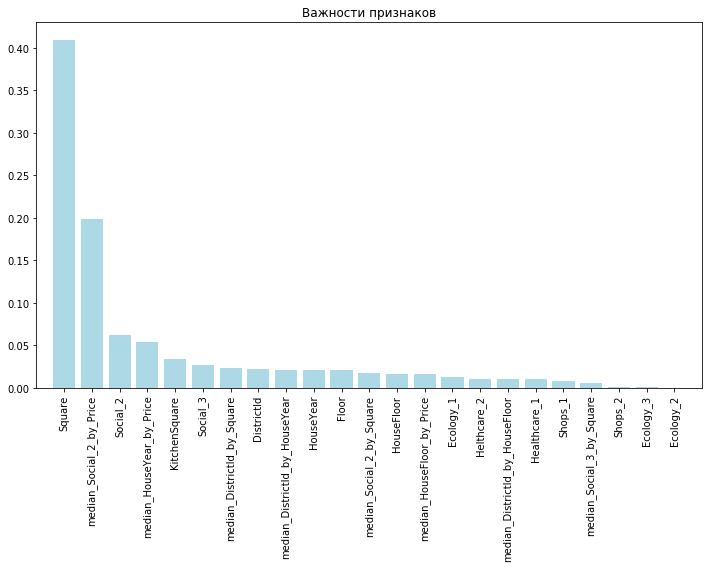

In [47]:
plt.figure(figsize=(10,8))
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Baжнocти признаков')
plt.bar(range(X_train.shape[1]), importances[indices],
        color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),
          X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Теперь попробуем использовать в нашей модели всю обучающую выборку о ценить модель с помощью кросс-валидации

In [48]:
def prepare_full_data(df):    
    """
        Соединяем все обработки данных в одну функцию
    """
    feat_outliers = df.drop(['Price', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis=1).columns
    df_quartiles = df.describe().loc[['25%', '75%']][feat_outliers]
    ratio_coef = (df.loc[df['LifeSquare'].notna(), 'LifeSquare']
              / df.loc[df['LifeSquare'].notna(), 'Square']).mean()
    df = first_clean_data(df, ratio_coef, 'train', df_quartiles)    
    df = df.drop(['Rooms', 'LifeSquare', 'Social_1'], axis=1)
    
    stats = []
    stats.append(get_stats(df, 'HouseYear', 'Price', aggr_f='median'))
    stats.append(get_stats(df, 'Social_2', 'Price', aggr_f='median'))
    stats.append(get_stats(df, 'Social_2', 'Square', aggr_f='median'))
    stats.append(get_stats(df, 'Social_3', 'Square', aggr_f='median'))
    stats.append(get_stats(df, 'DistrictId', 'Square', aggr_f='median'))
    stats.append(get_stats(df, 'DistrictId', 'HouseYear', aggr_f='median'))
    stats.append(get_stats(df, 'DistrictId', 'HouseFloor', aggr_f='median'))
    stats.append(get_stats(df, 'HouseFloor', 'Price', aggr_f='median'))
    df = apply_stats(df, stats)
    return df, stats, ratio_coef

In [49]:
data, stats, ratio_coef = prepare_full_data(data)
X = data.drop(['Id', 'Price'], axis=1)
y = data['Price']

In [50]:
# Поиск по сетке
params = {'max_depth': range(8,15), 'max_features': range(7, 15)}
rfr = RandomForestRegressor(n_estimators=100, random_state=102)
clf = GridSearchCV(rfr, params, cv=5, scoring="r2")
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=102, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(8, 15), 'max_features': range(7, 15)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [51]:
clf.best_params_

{'max_depth': 14, 'max_features': 10}

In [52]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')    
    return scores.mean()

In [53]:
model = RandomForestRegressor(n_estimators=100, max_depth=14, max_features=10, random_state=102)
evaluate_model(model, X, y)

0.7542442379361676

In [54]:
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=102,
           verbose=0, warm_start=False)

теперь применим обученную модель RandomForest на тестовых данных. Сперва напишем функцию обработки тестовых данных

In [55]:
def prepare_test_data(df, ratio_coef, stats):    
    df = first_clean_data(df, ratio_coef, 'test')    
    df = df.drop(['Rooms', 'LifeSquare', 'Social_1'], axis=1)
    df = apply_stats(df, stats)
    return df

In [56]:
test = prepare_test_data(test, ratio_coef, stats)

In [57]:
test['Price'] = model.predict(test.drop('Id', axis=1))

Посмотрим распределение прогнозной цены

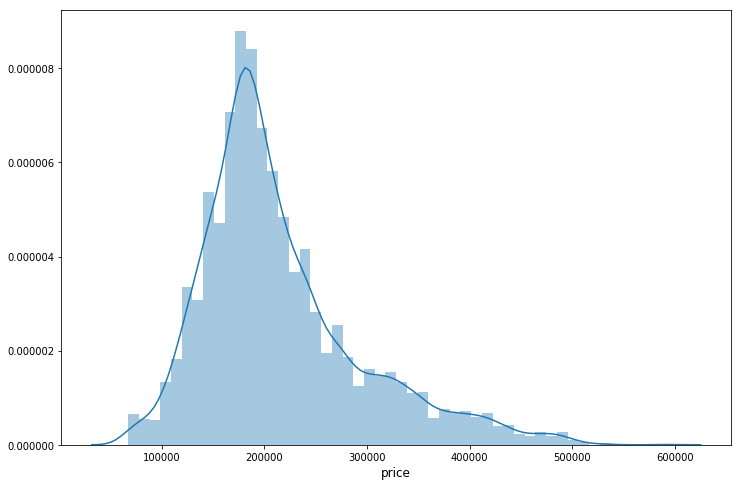

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(test['Price'], bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

Распределение прогнорзной цены совпадает с распределением цены на обучающей выборка, что может говорить о примерном соответствии данных истинным значениям. Выгрузим прогнозные цены в файл

In [59]:
test.loc[:, ['Id','Price']].to_csv('AChigrai_predictions.csv', index=None)